In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline  

In [48]:
data = pd.read_csv('./gifts-data.tsv', delimiter='\t')

#dropping invalid rows (every second BTW)
data = data.drop([i for i in range (1, len(data), 2)], axis=0)

#droppint working columns
to_drop = ['INPUT:theme', 'ASSIGNMENT:link', 'ASSIGNMENT:assignment_id', 'ASSIGNMENT:worker_id',
           'ASSIGNMENT:status', 'ASSIGNMENT:started', 'ACCEPT:verdict', 'ACCEPT:comment']
data = data.drop(to_drop, axis=1)

#dropping fully nan columns
for col in data.columns:
    nan_ = sum(data[col].isnull())
    if nan_ == len(data):
        data = data.drop([col], axis=1)

#checking out what's left
for key, value in data.iloc[0].iteritems():
    print (key, value)

OUTPUT:self_age 53.0
OUTPUT:self_time 2.0
OUTPUT:person_age 56.0
OUTPUT:person_tel 2.0
OUTPUT:person_auto 0.0
OUTPUT:person_hair 0.0
OUTPUT:person_time 7.0
OUTPUT:person_work 2.0
OUTPUT:self_gender 1.0
OUTPUT:person_hobby 0.0
OUTPUT:person_music 4.0
OUTPUT:person_sport 0.0
OUTPUT:person_gender 1.0
OUTPUT:person_height 3.0
OUTPUT:person_mental 0.0
OUTPUT:person_social 2.0
OUTPUT:self_variants 1.0
OUTPUT:person_animals 1.0
OUTPUT:self_gift_link nan
OUTPUT:self_gift_mark 0.0
OUTPUT:self_gift_name Аккустическая система с фм
OUTPUT:person_psycho_1 1.0
OUTPUT:person_psycho_2 0.0
OUTPUT:person_psycho_3 0.0
OUTPUT:person_psycho_4 0.0
OUTPUT:person_psycho_5 0.0
OUTPUT:person_psycho_6 0.0
OUTPUT:person_psycho_7 0.0
OUTPUT:person_psycho_8 1.0
OUTPUT:person_psycho_9 1.0
OUTPUT:self_gift_times 6.0
OUTPUT:self_gift_usage 0.0
OUTPUT:person_closeness 4.0
OUTPUT:person_education 1.0
OUTPUT:self_gift_desc_1 0.0
OUTPUT:self_gift_desc_2 0.0
OUTPUT:self_gift_desc_3 1.0
OUTPUT:self_gift_desc_4 1.0
OUTPUT:se

In [49]:
# dropping text features (but not gift description)
text_like = ['OUTPUT:person_character_word', 'OUTPUT:person_appearance_word', 'OUTPUT:person_description_text',
            'OUTPUT:person_communication_word', 'OUTPUT:person_individuality_word', 'OUTPUT:self_gift_link',]

data = data.drop(text_like, axis=1) #at the start we do not really need it

#gift description drop
data = data.drop(['OUTPUT:self_gift_name'], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

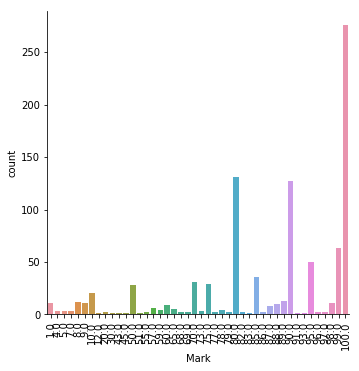

In [50]:
sns.catplot(x='Mark', kind='count', data=pd.DataFrame(data['OUTPUT:self_gift_mark_2'].values, columns=['Mark']), )
plt.xticks(rotation=90)


тут рассказать про три пика и про то что оценка от 1 до 100 для того чтобы получить три пика 80 90 100, 
которые соответствуют оценкам 3 4 и 5 в пятибальной шкале и мы бы с гарантией их не получили, если бы поставили пятибальную систему

In [51]:
#
# тут бы пошабить распределение до более адекватного
# чтобы показать улучшающуюся чиселку и восклицание "нихуя мы шарим"

# Encoding

In [53]:
# useless at first view
additional_drops = ['OUTPUT:self_gift_mark', 'OUTPUT:self_variants', 'OUTPUT:self_gift_times', 'OUTPUT:self_gift_usage',
                    'OUTPUT:self_gift_bad_usage']
data = data.drop(additional_drops, axis=1)


for key, value in data.iloc[0].iteritems():
    print (key, value)

OUTPUT:self_age 53.0
OUTPUT:self_time 2.0
OUTPUT:person_age 56.0
OUTPUT:person_tel 2.0
OUTPUT:person_auto 0.0
OUTPUT:person_hair 0.0
OUTPUT:person_time 7.0
OUTPUT:person_work 2.0
OUTPUT:self_gender 1.0
OUTPUT:person_hobby 0.0
OUTPUT:person_music 4.0
OUTPUT:person_sport 0.0
OUTPUT:person_gender 1.0
OUTPUT:person_height 3.0
OUTPUT:person_mental 0.0
OUTPUT:person_social 2.0
OUTPUT:person_animals 1.0
OUTPUT:person_psycho_1 1.0
OUTPUT:person_psycho_2 0.0
OUTPUT:person_psycho_3 0.0
OUTPUT:person_psycho_4 0.0
OUTPUT:person_psycho_5 0.0
OUTPUT:person_psycho_6 0.0
OUTPUT:person_psycho_7 0.0
OUTPUT:person_psycho_8 1.0
OUTPUT:person_psycho_9 1.0
OUTPUT:person_closeness 4.0
OUTPUT:person_education 1.0
OUTPUT:self_gift_desc_1 0.0
OUTPUT:self_gift_desc_2 0.0
OUTPUT:self_gift_desc_3 1.0
OUTPUT:self_gift_desc_4 1.0
OUTPUT:self_gift_desc_5 0.0
OUTPUT:self_gift_desc_6 2.0
OUTPUT:self_gift_desc_7 1.0
OUTPUT:self_gift_desc_8 2.0
OUTPUT:self_gift_desc_9 1.0
OUTPUT:self_gift_mark_2 100.0
OUTPUT:person_chron

In [62]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer

Y = data['OUTPUT:self_gift_mark_2']
X = data.drop('OUTPUT:self_gift_mark_2', axis=1) 

leave = ['OUTPUT:person_age', 'OUTPUT:self_age']
to_onehot = X.drop(['OUTPUT:person_age', 'OUTPUT:self_age'], axis=1).columns.values

onehotencoded = pd.get_dummies(X[to_onehotencode])

to_binarize = []

def binarize_column(data , column):
    un = data[column].unique()
    un_dict = {v:k for k, v in enumerate(un)}
    data[column] = data[column].apply(lambda x: un_dict[x])
   
def binarize_set(data):
    for col in data.columns:
        binarize_column(data, col)
    
binarized = data[to_binarize].copy()
binarize_set(binarized)

In [65]:
len(to_onehot) + len(leave) == len(X.columns)

True

In [66]:
X_encoded = pd.concat([onehotencoded, X[leave]], axis=1)

# Missing values

In [67]:
for col in X_encoded.columns:
    nan_ = sum(X_encoded[col].isnull())
    if nan_ > 0:
        print (col, nan_/float(len(X_encoded)))

No missing values. Pretty situation.

First approach. Just encoded values and random forest.

In [71]:
from sklearn.model_selection import GridSearchCV

def score_params(*data, param_grid):
    X, Y = data
    rfr=RandomForestRegressor(random_state=42)

    

    CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 10)
    CV_rfc.fit(X, Y)

    print (CV_rfc.best_params_)
    rfr=RandomForestRegressor(random_state=42)
    rfr.set_params(**CV_rfc.best_params_)
    mean, std = perform_n_cv(rfr, X, Y, cv_count=10, scoring=make_scorer(mean_squared_error), iterations=10)
    print (mean, '+-' ,std)
    
def perform_n_cv(clf, x, y, cv_count, scoring, iterations):
    cv_accumulator = []
    for i in range(iterations):
        cv = cross_val_score(clf, x, y, cv=cv_count, scoring=scoring)
        cv_accumulator.append([np.mean(np.sqrt(cv)), np.std(np.sqrt(cv))])
        
    return np.mean(np.array(cv_accumulator)[:, 0]), np.mean(np.array(cv_accumulator)[:, 1])

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

score_params(X_encoded, Y,
             param_grid = {'n_estimators': [15, 20, 25, 30, 40],
                           'max_depth' : [1, 2, 3, 4, 5, None]})

{'max_depth': 2, 'n_estimators': 25}
23.846835097847883 +- 3.473360060146124


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

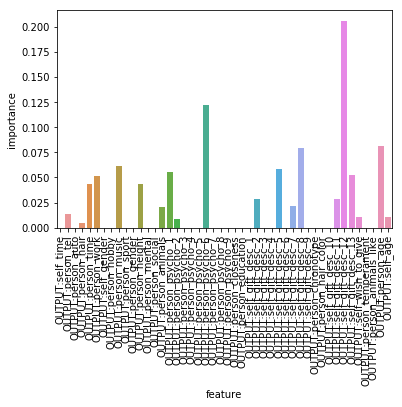

In [74]:
# feature importance JFY
clf = RandomForestRegressor(random_state=42, max_depth=2, n_estimators=25)
clf.fit(X_encoded, Y)
g= sns.barplot(x='feature', y='importance', data=pd.DataFrame(list(zip(clf.feature_importances_, X_encoded.columns)), columns=['importance', 'feature']))
plt.xticks(rotation=90)